<a href="https://colab.research.google.com/github/BiancaTaisePommerening/Internet_Prices/blob/exploratory_analysis/exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internet Prices Dataset

## Extract and Explore

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline


In [2]:
# load the dataset
from google.colab import files
uploaded = files.upload()

Saving worldwide internet prices in 2022 - IN 2022.csv to worldwide internet prices in 2022 - IN 2022.csv


In [129]:
internet_prices_df = pd.read_csv("worldwide internet prices in 2022 - IN 2022.csv")

internet_prices_df.head()

,Country code,Name,Continental region,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020)
0,IL,Israel,NEAR EAST,27.0,$0.05,$0.02,$20.95,$0.11,$0.90
1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,$0.15,$0.10,$7.08,$0.21,$0.27
2,FJ,Fiji,OCEANIA,18.0,$0.19,$0.05,$0.85,$0.59,$3.57
3,IT,Italy,WESTERN EUROPE,29.0,$0.27,$0.09,$3.54,$0.43,$1.73
4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,$0.27,$0.03,$0.92,$0.63,$0.68


In [130]:
internet_prices_df.describe()


,NO. OF Internet Plans
count,230.000000
mean,26.730435
std,16.468216
min,1.000000
25%,15.000000
50%,22.000000
75%,36.000000
max,60.000000


In [131]:
internet_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country code                                      241 non-null    object 
 1   Name                                              242 non-null    object 
 2   Continental region                                242 non-null    object 
 3   NO. OF Internet Plans                             230 non-null    float64
 4   Average price of 1GB (USD)                        242 non-null    object 
 5   Cheapest 1GB for 30 days (USD)                    230 non-null    object 
 6   Most expensive 1GB (USD)                          230 non-null    object 
 7   Average price of 1GB (USD  at the start of 2021)  230 non-null    object 
 8   Average price of 1GB (USD – at start of 2020)     230 non-null    object 
dtypes: float64(1), object(

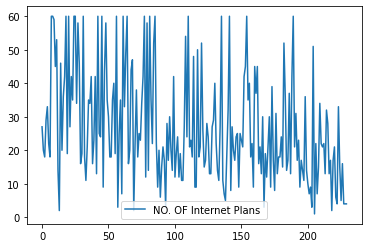

In [132]:
internet_prices_df.plot()

In [133]:
list(internet_prices_df)

['Country code',
 'Name',
 'Continental region',
 'NO. OF Internet Plans ',
 'Average price of 1GB (USD)',
 'Cheapest 1GB for 30 days (USD)',
 'Most expensive 1GB (USD)',
 'Average price of 1GB (USD  at the start of 2021)',
 'Average price of 1GB (USD – at start of 2020)']

## Transform

In [134]:
# Standardize column for loading into the database.

internet_prices_df = internet_prices_df.rename(columns={"Country code": "country_code", "Name": "name", "Continental region": "continental_region", "NO. OF Internet Plans ": "number_internet_plans", "Average price of 1GB (USD)": "avg_price_1gb", "Cheapest 1GB for 30 days (USD)": "cheaspest_1gb_30_days", "Most expensive 1GB (USD)":"most_expensive_1gb", "Average price of 1GB (USD  at the start of 2021)": "avg_price_1gb_starting_2021", "Average price of 1GB (USD – at start of 2020)": "avg_price_1gb_starting_2020"})
internet_prices_df.head()

,country_code,name,continental_region,number_internet_plans,avg_price_1gb,cheaspest_1gb_30_days,most_expensive_1gb,avg_price_1gb_starting_2021,avg_price_1gb_starting_2020
0,IL,Israel,NEAR EAST,27.0,$0.05,$0.02,$20.95,$0.11,$0.90
1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,$0.15,$0.10,$7.08,$0.21,$0.27
2,FJ,Fiji,OCEANIA,18.0,$0.19,$0.05,$0.85,$0.59,$3.57
3,IT,Italy,WESTERN EUROPE,29.0,$0.27,$0.09,$3.54,$0.43,$1.73
4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,$0.27,$0.03,$0.92,$0.63,$0.68


In [135]:
# Remove commnets that are not numbers from the price columns.

internet_prices_df = internet_prices_df.replace({"NO PROVIDERS": "", "HYPERINFLATION": "", "Prices listed in non-convertible 'units'": "", "UNRELIABLE EXCHANGE RATES": "", "NO PACKAGES": ""})

internet_prices_df.tail()

,country_code,name,continental_region,number_internet_plans,avg_price_1gb,cheaspest_1gb_30_days,most_expensive_1gb,avg_price_1gb_starting_2021,avg_price_1gb_starting_2020
237,VA,Vatican City (Holy See),Europe,NaN,,NaN,NaN,NaN,NaN
238,VE,Venezuela,SOUTH AMERICA,NaN,,NaN,NaN,NaN,NaN
239,WF,Wallis and Futuna,OCEANIA,NaN,,NaN,NaN,NaN,NaN
240,CD,Congo (Democratic Republic of),SUB-SAHARAN AFRICA,NaN,,NaN,NaN,NaN,NaN
241,ZW,Zimbabwe,SUB-SAHARAN AFRICA,NaN,,NaN,NaN,NaN,NaN


In [136]:
# Removing the dollar sign from all the price columns.
internet_prices_df = internet_prices_df.replace({"\$":""}, regex=True)
internet_prices_df

,country_code,name,continental_region,number_internet_plans,avg_price_1gb,cheaspest_1gb_30_days,most_expensive_1gb,avg_price_1gb_starting_2021,avg_price_1gb_starting_2020
0,IL,Israel,NEAR EAST,27.0,0.05,0.02,20.95,0.11,0.90
1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,0.15,0.10,7.08,0.21,0.27
2,FJ,Fiji,OCEANIA,18.0,0.19,0.05,0.85,0.59,3.57
3,IT,Italy,WESTERN EUROPE,29.0,0.27,0.09,3.54,0.43,1.73
4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,0.27,0.03,0.92,0.63,0.68
...,...,...,...,...,...,...,...,...,...
237,VA,Vatican City (Holy See),Europe,NaN,,NaN,NaN,NaN,NaN
238,VE,Venezuela,SOUTH AMERICA,NaN,,NaN,NaN,NaN,NaN
239,WF,Wallis and Futuna,OCEANIA,NaN,,NaN,NaN,NaN,NaN
240,CD,Congo (Democratic Republic of),SUB-SAHARAN AFRICA,NaN,,NaN,NaN,NaN,NaN


In [137]:
# Drop null values
internet_prices_df = internet_prices_df.dropna()
internet_prices_df.shape

(229, 9)

In [138]:
internet_prices_df.dtypes

country_code                    object
name                            object
continental_region              object
number_internet_plans          float64
avg_price_1gb                   object
cheaspest_1gb_30_days           object
most_expensive_1gb              object
avg_price_1gb_starting_2021     object
avg_price_1gb_starting_2020     object
dtype: object

In [139]:
# select columns to convert from object to float.
cols = ['avg_price_1gb', 'cheaspest_1gb_30_days', 'most_expensive_1gb', 'avg_price_1gb_starting_2021', 'avg_price_1gb_starting_2020']

cols

['avg_price_1gb',
 'cheaspest_1gb_30_days',
 'most_expensive_1gb',
 'avg_price_1gb_starting_2021',
 'avg_price_1gb_starting_2020']

In [140]:
#  cols = internet_prices_df.loc[:, ('avg_price_1gb', 'cheaspest_1gb_30_days', 'most_expensive_1gb', 'avg_price_1gb_starting_2021', 'avg_price_1gb_starting_2020')]


In [141]:
# Convert necessary datatypes.
internet_prices_df[cols] = internet_prices_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

internet_prices_df.dtypes


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


country_code                    object
name                            object
continental_region              object
number_internet_plans          float64
avg_price_1gb                  float64
cheaspest_1gb_30_days          float64
most_expensive_1gb             float64
avg_price_1gb_starting_2021    float64
avg_price_1gb_starting_2020    float64
dtype: object

In [142]:
internet_prices_df['number_internet_plans'] = internet_prices_df['number_internet_plans'].astype(int)

internet_prices_df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


country_code                    object
name                            object
continental_region              object
number_internet_plans            int64
avg_price_1gb                  float64
cheaspest_1gb_30_days          float64
most_expensive_1gb             float64
avg_price_1gb_starting_2021    float64
avg_price_1gb_starting_2020    float64
dtype: object

In [144]:
internet_prices_df.head()

,country_code,name,continental_region,number_internet_plans,avg_price_1gb,cheaspest_1gb_30_days,most_expensive_1gb,avg_price_1gb_starting_2021,avg_price_1gb_starting_2020
0,IL,Israel,NEAR EAST,27,0.05,0.02,20.95,0.11,0.90
1,KG,Kyrgyzstan,CIS (FORMER USSR),20,0.15,0.10,7.08,0.21,0.27
2,FJ,Fiji,OCEANIA,18,0.19,0.05,0.85,0.59,3.57
3,IT,Italy,WESTERN EUROPE,29,0.27,0.09,3.54,0.43,1.73
4,SD,Sudan,SUB-SAHARAN AFRICA,33,0.27,0.03,0.92,0.63,0.68


In [146]:
internet_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 229
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country_code                 229 non-null    object 
 1   name                         229 non-null    object 
 2   continental_region           229 non-null    object 
 3   number_internet_plans        229 non-null    int64  
 4   avg_price_1gb                229 non-null    float64
 5   cheaspest_1gb_30_days        229 non-null    float64
 6   most_expensive_1gb           229 non-null    float64
 7   avg_price_1gb_starting_2021  227 non-null    float64
 8   avg_price_1gb_starting_2020  226 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 17.9+ KB


In [149]:
internet_prices_df = internet_prices_df.dropna(axis='columns')
internet_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 229
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_code           229 non-null    object 
 1   name                   229 non-null    object 
 2   continental_region     229 non-null    object 
 3   number_internet_plans  229 non-null    int64  
 4   avg_price_1gb          229 non-null    float64
 5   cheaspest_1gb_30_days  229 non-null    float64
 6   most_expensive_1gb     229 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 14.3+ KB
